In [1]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# library import
import numpy as np
import pandas as pd
import glob

# 시각화 library import
!pip install missingno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#한글폰트 오류안나게
import matplotlib.pyplot as plt
from matplotlib import font_manager

#font_fname = 'C:\\Windows\\Fonts\\batang.ttc' # 아래한글 함초롱바탕 글꼴
#font_family = font_manager.FontProperties(fname=font_fname).get_name()
#plt.rcParams['font.family'] = font_family

!pip install kmodes
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.utils import resample

In [2]:
cluster_data= pd.read_csv('범주형클러스터링_회원정보.csv')

In [14]:
cluster_data= cluster_data.drop(columns=['Unnamed: 0'])

In [15]:
cluster_data.head()

,정규화_부유도,Life_Stage,VIP등급코드,1순위업종,2순위업종,3순위업종,기준년월,연령,회원여부_이용가능,회원여부_이용가능_CA,...,최종카드발급경과월,총이용금액,총유효카드수,총연회비,연체비율,부유도_지표,이용금액_신판_B0M,이용금액_신판_R3M,이용금액_신판_R6M,이용금액_신판_R12M
0,2.176212,5,7.0,납부,쇼핑,일상생활,201812,40.0,1,1,...,27,-90838,2,0,-0.0,-36330.75,107903,318059,718343,3262344
1,2.413563,4,Missing,납부,쇼핑,교통,201812,30.0,1,1,...,23,1417978,1,0,0.0,567194.50,243960,786755,1655640,5604157
2,2.289359,4,Missing,Missing,Missing,Missing,201812,40.0,1,1,...,10,628424,1,0,0.0,251373.90,273763,273763,273763,757181
3,2.243714,4,Missing,교통,Missing,Missing,201812,40.0,1,1,...,48,338262,3,0,0.0,135309.40,48942,146868,268087,468022
4,2.190502,5,Missing,Missing,Missing,Missing,201812,40.0,0,0,...,22,0,1,0,0.0,4.30,0,0,0,673648


In [16]:
cluster_data.shape

(2873611, 84)

In [4]:
# 범주형 컬럼만 선택
categorical_columns = ['Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']

In [5]:
# 범주형 컬럼의 인덱스 얻기
categorical_columns_indices = [cluster_data.columns.get_loc(col) for col in categorical_columns]
#print(categorical_columns_indices)

In [17]:
# 데이터의 20%를 샘플링
sampled_data = resample(cluster_data, n_samples=int(len(cluster_data) * 0.2), random_state=42)

In [18]:
sampled_data.shape

(574722, 84)

In [21]:
# 데이터프레임을 CSV 파일로 내보내기
sampled_data.to_csv('sampled_data_1121.csv', index=False, encoding='utf-8-sig')

[INFO] K=2 클러스터링 완료, 소요 시간: 1456.91초
[INFO] K=3 클러스터링 완료, 소요 시간: 1320.45초
[INFO] K=4 클러스터링 완료, 소요 시간: 2303.68초
[INFO] K=5 클러스터링 완료, 소요 시간: 2904.19초
[INFO] K=6 클러스터링 완료, 소요 시간: 4450.13초


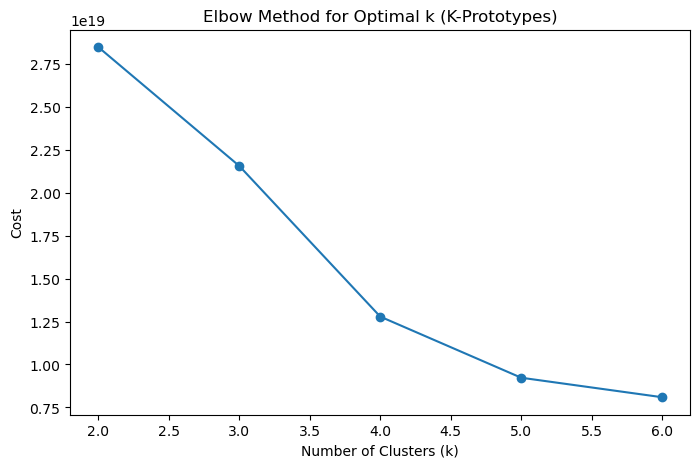

In [8]:
import time
from sklearn.utils import resample

# 데이터 샘플링 (20%)
sampled_data = resample(cluster_data, n_samples=int(len(cluster_data) * 0.2), random_state=42)  # 20% 샘플링

# 클러스터 개수와 비용 저장
costs = []
k_values = range(2, 7)  # 클러스터 개수를 2부터 6까지 시도

# K-Prototypes 실행
for k in k_values:
    start_time = time.time()  # 클러스터링 시작 시간 기록
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=2, max_iter=100, random_state=42)  # 초기화 방식과 반복 횟수 제한 추가
    kproto.fit(sampled_data, categorical=categorical_columns_indices)  # 범주형 컬럼 전달
    costs.append(kproto.cost_)
    elapsed_time = time.time() - start_time  # 소요 시간 계산
    
    # 진행 상황 출력
    print(f"[INFO] K={k} 클러스터링 완료, 소요 시간: {elapsed_time:.2f}초")

# 그래프 출력 (엘보우 그래프)
plt.figure(figsize=(8, 5))
plt.plot(k_values, costs, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k (K-Prototypes)')
plt.show()

**아래 코드는 사용하지않는 코드**

In [ ]:

#sampled_data = sampled_data[['정규화_부유도','Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']]

In [ ]:
#sampled_data.shape

(574722, 6)

In [ ]:
# 수치형과 범주형 컬럼 구분
#numeric_columns = ['정규화_부유도']
#categorical_columns = ['Life_Stage', 'VIP등급코드', '1순위업종', '2순위업종', '3순위업종']

# 범주형 컬럼 인덱스
#categorical_columns_indices = [sampled_data.columns.get_loc(col) for col in categorical_columns]

# 수치형 데이터
#data_numeric = sampled_data[numeric_columns].values

In [ ]:
#sampled_data.shape

(574722, 6)

In [ ]:
# K-Prototypes 실행
#kproto = KPrototypes(n_clusters=4, init='Huang', random_state=42)
#clusters = kproto.fit_predict(sampled_data.values, categorical=categorical_columns_indices)

# 클러스터결과를 데이터프레임에추가
#sampled_data['Cluster'] = clusters